In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.978474
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

<Axes: >

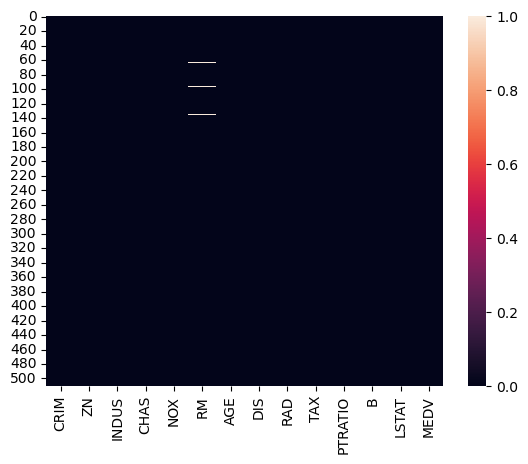

In [5]:
sb.heatmap(df.isnull())

In [6]:
a=df['RM'].mean()
a

6.287588932806324

In [7]:
df['RM'].fillna(a,inplace=True)

<Axes: >

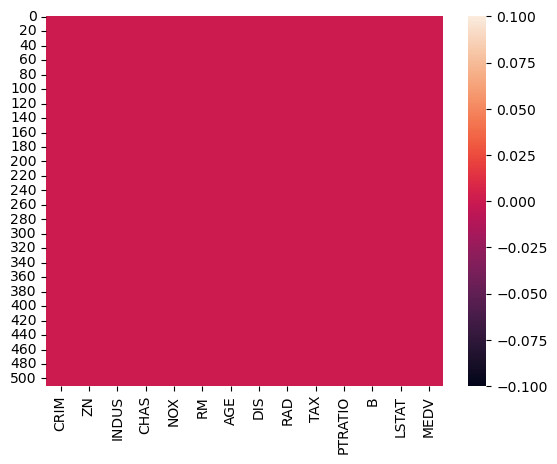

In [8]:
sb.heatmap(df.isnull())

In [9]:
X=df.drop('MEDV',axis=1)
Y=df['MEDV']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
X_train.shape

(357, 13)

In [13]:
X_test.shape

(154, 13)

In [14]:
Y_train.shape

(357,)

In [15]:
Y_test.shape

(154,)

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

In [17]:
X_train

array([[-0.4299804 ,  0.63160121, -0.91440378, ...,  0.54427184,
         0.22629536,  0.14790315],
       [ 0.96424356, -0.47229398,  0.98683949, ...,  0.77356739,
        -0.75580721,  0.10617357],
       [-0.44689447,  2.83939158, -1.2339651 , ..., -0.09775569,
         0.42548523, -1.09416566],
       ...,
       [ 0.23920306, -0.47229398,  0.98683949, ...,  0.77356739,
         0.43989954,  0.75298213],
       [-0.41134534, -0.47229398, -0.75755487, ..., -0.51048768,
         0.21120005, -0.28903015],
       [-0.44073013, -0.47229398, -0.79273594, ...,  0.31497629,
         0.43989954, -0.54799904]])

In [18]:
X_test=ss.transform(X_test)

In [19]:
X_test

array([[-0.42322322, -0.47229398, -0.65347756, ..., -0.28119213,
         0.39268416,  0.68302371],
       [-0.44648359, -0.47229398, -1.02287872, ...,  0.13153986,
         0.31210023, -0.33198707],
       [-0.44907447,  3.5017287 , -1.23103334, ..., -1.47352898,
         0.41515687, -0.66091438],
       ...,
       [-0.23486518, -0.47229398,  1.20378937, ..., -1.74868364,
         0.35715913, -1.38872743],
       [-0.33410269, -0.47229398, -0.47317462, ...,  1.14044027,
         0.4131139 ,  0.8155765 ],
       [-0.37620826, -0.47229398, -0.47317462, ...,  1.14044027,
         0.43989954, -0.61059341]])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,Y_train)

LinearRegression()

In [23]:
lr.coef_

array([-1.2141627 ,  1.58401644, -0.22763979,  1.12698611, -1.84073328,
        4.29861971, -1.92559069, -3.98181469,  1.33212325, -1.71458699,
       -1.12485583,  0.88671816, -0.1504319 ])

In [24]:
lr.intercept_

22.54481792717087

In [25]:
y_pred=lr.predict(X_test)
y_pred

array([19.17084709, 15.89309571, 35.00468383, 28.07294214, 22.42775439,
       23.10220744, 27.13687835, 35.28470403, 18.91610069, 32.52735103,
       21.78620432, 37.1376438 , 23.86497752, 12.15180673, 24.40267974,
       21.36641457, 26.88078117, 12.77721798, 21.8014905 , 28.05671067,
       26.41953965, 25.99662191, 34.25025936, 25.36653842, 14.09615832,
       13.74550879, 19.94883287, 16.09533264, 26.34885549, 16.59900516,
       17.38060767, 16.03094064, 17.04457235, 19.7943668 , 21.47820401,
       17.55785091, 19.27593687, 19.64437637, 17.15896331, 27.46943177,
       11.32673024, 18.60640567, 21.57726499, 21.46029657, 38.15966485,
       35.67166398, 39.89648486, 13.56974362, 30.51317823, 45.65343506,
       27.03113529, 18.66717069, 17.37861584, 21.12206331, 22.7423134 ,
       23.71750751, 21.06803921, 35.47634173, 21.67761464, 31.68736828,
       35.62911939, 18.11594161, 26.8229923 , 23.7840298 , 22.34068267,
       20.0879878 , 13.56921937, 37.0651573 , 21.07290248, 28.59

In [26]:
dict={"Actual ouput":Y_test,'Predict ouput':y_pred}
df1=pd.DataFrame(dict)
df1

,Actual ouput,Predict ouput
47,16.6,19.170847
345,17.5,15.893096
284,32.2,35.004684
221,21.7,28.072942
502,20.6,22.427754
...,...,...
95,28.4,28.208473
122,20.5,21.769547
162,50.0,37.603984
23,14.5,16.043770


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
print("mean sqaured error",mean_squared_error(Y_test,y_pred))

mean sqaured error 26.79567421336234


In [29]:
mse=mean_squared_error(Y_test,y_pred)
mse

26.79567421336234

In [30]:
rmse=np.sqrt(mse)
rmse

5.176453826063007

In [31]:
from sklearn.metrics import r2_score

In [32]:
print('r2_score',r2_score(Y_test,y_pred))

r2_score 0.6684004803480592


In [33]:
residual_error=Y_test-y_pred
print("residual error",residual_error)

residual error 47     -2.570847
345     1.606904
284    -2.804684
221    -6.372942
502    -1.827754
         ...    
95      0.191527
122    -1.269547
162    12.396016
23     -1.543770
13      1.778584
Name: MEDV, Length: 154, dtype: float64


In [34]:
y_pred.shape


(154,)

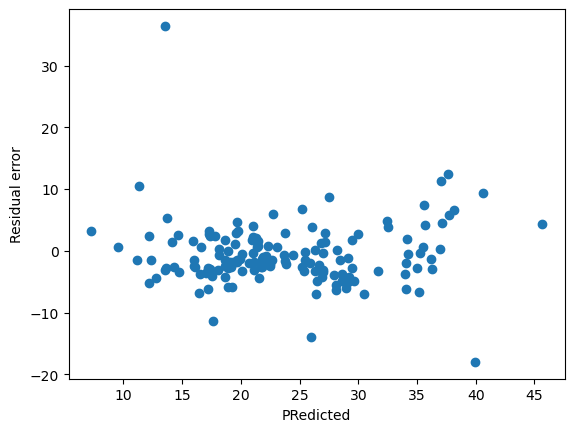

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,residual_error)
# sb.scatterplot(y_pred,residual_error)
# plt.plot(y_pred,residual_error,color='red')
plt.xlabel('PRedicted')
plt.ylabel('Residual error')
plt.show()

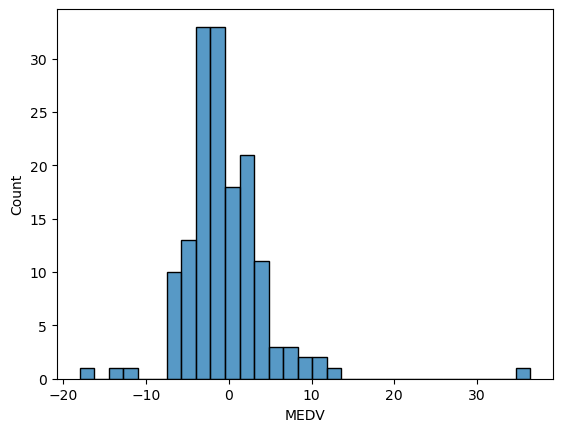

In [36]:
sb.histplot(residual_error)
plt.show()

<Axes: xlabel='MEDV', ylabel='Density'>

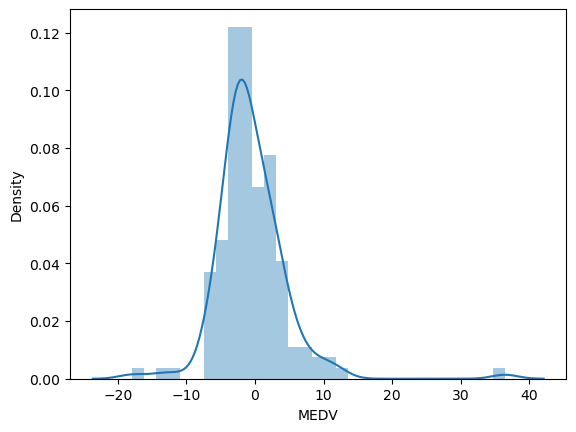

In [37]:
sb.distplot(residual_error,hist=True)

<Axes: xlabel='MEDV', ylabel='Density'>

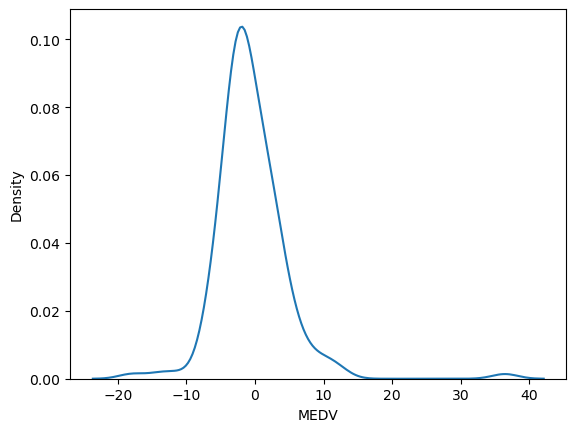

In [38]:
sb.distplot(residual_error,hist=False)

In [39]:
print(residual_error.skew())

2.3687204730463294


In [40]:
lr.score(X_train,Y_train)

0.6006272963618027

In [41]:
lr.score(X_test,Y_test)

0.6684004803480592

In [42]:
X=df.drop('MEDV',axis=1)
Y=df['MEDV']

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
pf=PolynomialFeatures(2)

In [45]:
X_poly=pf.fit_transform(X)

In [46]:
X_poly

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 4.44330000e-01, 0.00000000e+00, ...,
        1.17649000e+05, 7.20300000e+03, 4.41000000e+02],
       [1.00000000e+00, 7.77630000e-01, 0.00000000e+00, ...,
        1.17649000e+05, 2.60680000e+04, 5.77600000e+03],
       [1.00000000e+00, 6.54320000e-01, 0.00000000e+00, ...,
        1.03041000e+05, 1.44450000e+04, 2.02500000e+03]])

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [48]:
X_poly.shape

(511, 105)

In [49]:
Y_train.shape

(357,)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
X_train=ss.fit_transform(X_train)

In [52]:
X_test=ss.transform(X_test)

In [53]:
X_train

array([[ 0.        , -0.4299804 ,  0.63160121, ...,  0.17146083,
         0.32719222, -0.08396018],
       [ 0.        ,  0.96424356, -0.47229398, ..., -1.26503813,
        -0.13282254, -0.10862259],
       [ 0.        , -0.44689447,  2.83939158, ...,  0.50809565,
        -0.95205453, -0.56648084],
       ...,
       [ 0.        ,  0.23920306, -0.47229398, ...,  0.53304867,
         1.08732667,  0.33967757],
       [ 0.        , -0.41134534, -0.47229398, ...,  0.146572  ,
        -0.13685264, -0.31305552],
       [ 0.        , -0.44073013, -0.47229398, ...,  0.53304867,
        -0.34773006, -0.41843295]])

In [54]:
X_test

array([[ 0.        , -0.42322322, -0.47229398, ...,  0.45161085,
         0.98348175,  0.28438082],
       [ 0.        , -0.44648359, -0.47229398, ...,  0.31460039,
        -0.1499    , -0.3321008 ],
       [ 0.        , -0.44907447,  3.5017287 , ...,  0.49026511,
        -0.4781194 , -0.45729461],
       ...,
       [ 0.        , -0.23486518, -0.47229398, ...,  0.3909024 ,
        -1.27987594, -0.60454343],
       [ 0.        , -0.33410269, -0.47229398, ...,  0.48674305,
         1.14036852,  0.3905535 ],
       [ 0.        , -0.37620826, -0.47229398, ...,  0.53304867,
        -0.41677524, -0.44050727]])

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr.fit(X_train,Y_train)

LinearRegression()

In [57]:
lr.coef_

array([-6.67489049e+13,  7.03521265e+01,  3.48609379e+01, -7.32223674e+01,
        9.15585349e+00,  5.04278932e+01,  4.19580185e+00,  2.96197216e+01,
       -2.03439394e+01,  4.69314497e+01,  5.01424986e+01,  1.83837114e+00,
        1.71068155e+01, -1.62660437e-02,  3.12721782e+00, -9.48760316e-01,
        1.07646120e+02, -1.32139761e-01, -8.72668115e+00,  1.80025955e+01,
       -9.90728370e+00, -4.38866030e+00,  2.06087139e+02, -4.28727280e+02,
        4.13029589e+01, -6.04368608e-01,  3.07430884e+00, -2.06814130e+00,
       -4.43222232e-01, -2.85403564e-01, -2.18596842e+01,  4.89369613e+00,
       -1.37524634e+00, -1.28296937e+01,  1.84840760e-01, -1.67872369e+00,
        6.38755887e+00, -6.61731121e+00, -9.77630584e-01,  8.95555651e+00,
       -3.66227101e+00,  2.36134398e+01,  6.44126562e+00,  1.68063423e+00,
        5.27785996e+00,  2.19728371e+01,  9.10748307e+00,  1.88170408e+01,
        1.15901354e+01, -6.34083220e+00,  9.15585349e+00, -1.02181187e+01,
       -6.95252054e+00,  

In [58]:
lr.intercept_

22.54481792717099

In [59]:
y_pred=lr.predict(X_test)
y_pred

array([19.50902352, 26.68619852, 28.37857489, 27.51375493, 17.63448698,
       20.56725995, 28.71266182, 35.43927395, 11.09403585, 36.89697705,
       18.83643471, 46.14138657, 24.71358323, 14.31358186, 25.32404736,
       24.02781276, 22.07688084, 13.33484661, 23.06925829, 28.09145912,
       20.11973533, 34.72380744, 36.44934016, 22.5611941 , 20.43287961,
        8.21656748, 17.28700414,  8.95252313, 20.09829446, 18.6820118 ,
       18.40781266,  9.43596986, 16.66189044, 22.47244155, 20.31698998,
       12.5904714 ,  9.99184968, 17.73405481, 18.37470772, 32.8479818 ,
       25.35799942,  9.63339891, 16.51300048, 21.13730768, 44.74612658,
       41.37911947, 41.2625599 , 36.25106207, 29.17647305, 56.94927604,
       26.50447772, 16.67307478, 16.39731717, 18.58565474, 27.24883322,
       28.68868494, 23.24657728, 34.44657383, 21.2330399 , 31.8768168 ,
       40.86993194, 20.0395645 , 23.84868228, 20.88842245, 21.78264576,
       27.33075238, 59.90203505, 42.9823629 , 20.18204354, 24.15

In [60]:
dict={"Actual output":Y_test,"PRedict output":y_pred}
df1=pd.DataFrame(dict)
df1

,Actual output,PRedict output
47,16.6,19.509024
345,17.5,26.686199
284,32.2,28.378575
221,21.7,27.513755
502,20.6,17.634487
...,...,...
95,28.4,24.534498
122,20.5,19.297610
162,50.0,50.537466
23,14.5,17.704850


In [61]:

from sklearn.metrics import mean_squared_error   

In [62]:
 mse=mean_squared_error(Y_test,y_pred)
mse

41.58493118724267

In [63]:
rmse=np.sqrt(mse)
rmse

6.44863793271437

In [64]:
from sklearn.metrics import r2_score

In [65]:
print("r2 score",r2_score(Y_test,y_pred))

r2 score 0.4853817412225373


In [66]:
residual_error=Y_test-y_pred
print('Residual error for each data points ',residual_error)

Residual error for each data points  47    -2.909024
345   -9.186199
284    3.821425
221   -5.813755
502    2.965513
         ...   
95     3.865502
122    1.202390
162   -0.537466
23    -3.204850
13     0.063714
Name: MEDV, Length: 154, dtype: float64


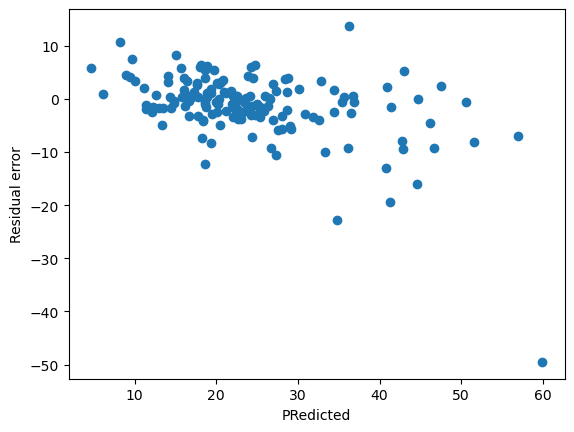

In [67]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,residual_error)
# sb.scatterplot(y_pred,residual_error)
# plt.plot(y_pred,residual_error,color='red')
plt.xlabel('PRedicted')
plt.ylabel('Residual error')
plt.show()

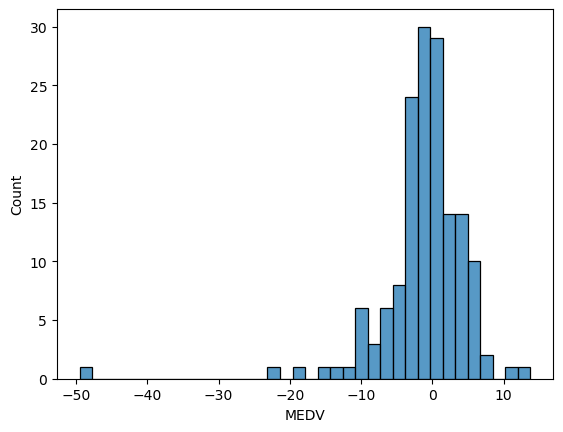

In [68]:
sb.histplot(residual_error)
plt.show()

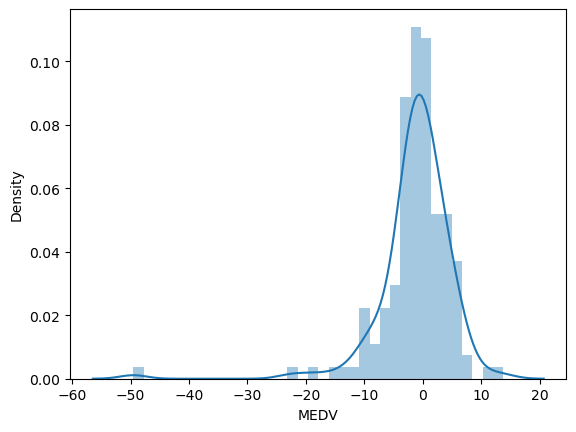

In [69]:
sb.distplot(residual_error,hist=True)
plt.show()

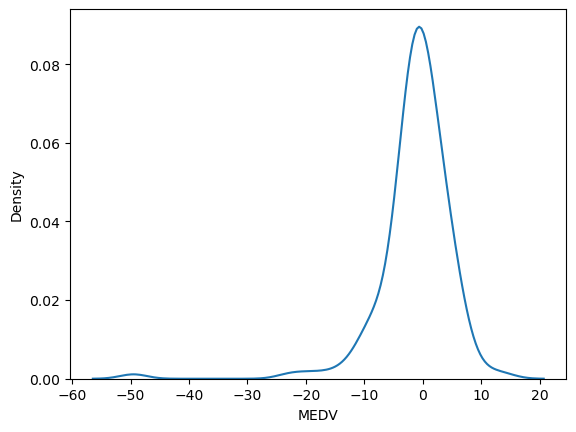

In [70]:
sb.distplot(residual_error,hist=False)
plt.show()

In [71]:
print(residual_error.skew())


-3.2936895769409404


In [72]:
lr.score(X_train,Y_train)

0.8429737410132614

In [73]:
lr.score(X_test,Y_test)

0.4853817412225373